# Super Resolution with different cv resize method
本實驗主要目標為測試不同的 opencv 縮小方法是否會影響深度學習方法在Super Resolution任務上的影響。
圖片使用 [SR論文(2012)](http://people.rennes.inria.fr/Aline.Roumy/results/SR_BMVC12.html) 標準Set5中蝴蝶的圖片。

## PSNR Result 

PSNR 越大越好，通常大於25是人類覺得可以接受的範圍。

| Shrinking Method | EDSR | ESPCN | CUBIC |
|-------|------|-------|-------|
| LINEAR | 30.034 | 29.034 | 26.664 |
| NEAREST| 23.735 | 23.827 | 23.214 |
| CUBIC | 32.330 | 30.049 | 26.984 |

可以看到LINER與CUBIC 還原的效果都不錯。
而NEAREST 效果就很差。


by Zino

2022/10/18 

In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
# download model
!wget https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x2.pb
!wget https://github.com/fannymonori/TF-ESPCN/raw/master/export/ESPCN_x2.pb
# download image
!wget https://raw.githubusercontent.com/linzino7/Set5-dataset/main/Set5/HR/butterfly.png

--2022-10-19 17:31:56--  https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x2.pb
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Saafke/EDSR_Tensorflow/master/models/EDSR_x2.pb [following]
--2022-10-19 17:31:57--  https://raw.githubusercontent.com/Saafke/EDSR_Tensorflow/master/models/EDSR_x2.pb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38490162 (37M) [application/octet-stream]
Saving to: ‘EDSR_x2.pb.1’

EDSR_x2.pb.1        100%[===================>]  36.71M   156MB/s    in 0.2s    

2022-10-19 17:31:57 (156 MB/s) - ‘EDSR_x2.pb.1’ saved [38490162/38490162]

--2022-10-19 17:

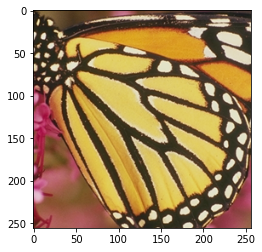

In [ ]:
# show image
img = cv2.imread("butterfly.png")
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
def inference(OrgImg, interpolation=cv2.INTER_LINEAR, title_="Super Resolution" ):
  # Shrink image
  shrinking = cv2.resize(OrgImg, dsize=None, fx=0.5, fy=0.5, interpolation=interpolation)

  # upscaled by EDSR
  sr = cv2.dnn_superres.DnnSuperResImpl_create()
  path = "EDSR_x2.pb"
  
  sr.readModel(path)
  sr.setModel("edsr",2)
  result_edsr = sr.upsample(shrinking)

  # upscaled by ESPCN
  path = "ESPCN_x2.pb"
  
  sr.readModel(path)
  sr.setModel("espcn",2)
  result_espcn = sr.upsample(shrinking)
  
  # upscaled cv.INTER_CUBIC image
  resized = cv2.resize(shrinking, dsize=None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
  
  psnr_edsr = cv2.PSNR(img, result_edsr)
  psnr_espcn = cv2.PSNR(img, result_espcn)
  psnr_CUBIC = cv2.PSNR(img, resized)
  
  
  plt.figure(figsize=(16,4))
  plt.suptitle("Shrink by "+title_)
  # show Original image
  plt.subplot(1,4,1)
  plt.title("Original")
  plt.imshow(OrgImg[:,:,::-1])
  
  # show EDSR result
  plt.subplot(1,4,2)
  plt.title("EDSR:"+str(psnr_edsr))
  plt.imshow(result_edsr[:,:,::-1])
  
  # show ESPCN result
  plt.subplot(1,4,3)
  plt.title("ESPCN:"+str(psnr_espcn))
  plt.imshow(result_espcn[:,:,::-1])

  # show OpenCV result
  plt.subplot(1,4,4)
  plt.title("INTER_CUBIC:"+str(psnr_CUBIC))
  plt.imshow(resized[:,:,::-1])

  plt.show()

  print(title_, "EDSR", psnr_edsr, "ESPCN", psnr_espcn, "INTER_CUBIC", psnr_CUBIC)

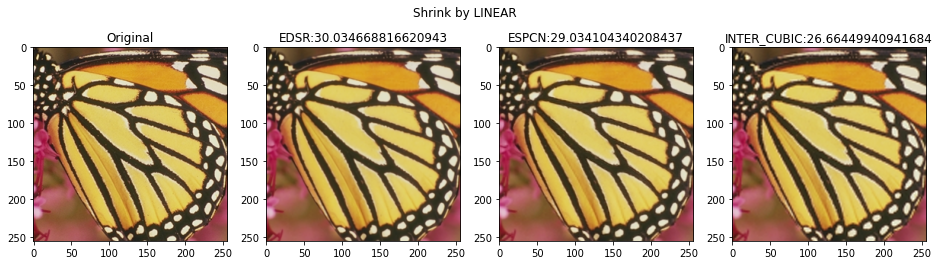

LINEAR EDSR 30.034668816620943 ESPCN 29.034104340208437 INTER_CUBIC 26.66449940941684


In [ ]:
inference(img, interpolation=cv2.INTER_LINEAR, title_="LINEAR")

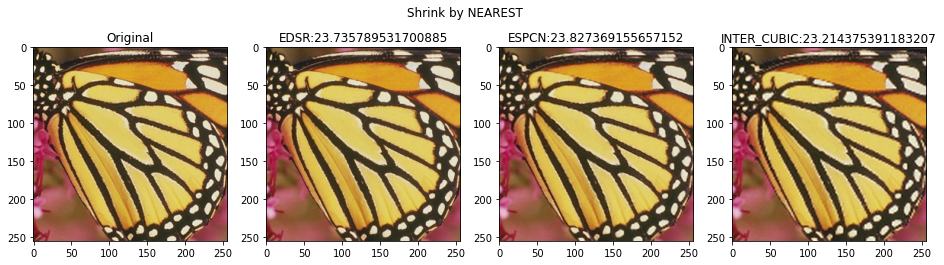

NEAREST EDSR 23.735789531700885 ESPCN 23.827369155657152 INTER_CUBIC 23.214375391183207


In [ ]:
inference(img, interpolation=cv2.INTER_NEAREST, title_="NEAREST")

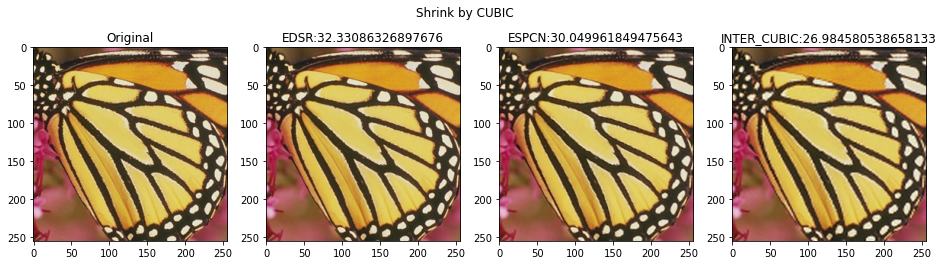

CUBIC EDSR 32.33086326897676 ESPCN 30.049961849475643 INTER_CUBIC 26.984580538658133


In [ ]:
inference(img, interpolation=cv2.INTER_CUBIC, title_="CUBIC")

# Reference


* opencv 官方 benchmark: https://docs.opencv.org/4.x/dc/d69/tutorial_dnn_superres_benchmark.html
* EDSR : https://github.com/Saafke/EDSR_Tensorflow/tree/master/models
* ESPCN : https://github.com/fannymonori/TF-ESPCN/tree/master/export
* other benchmark: https://blog.csdn.net/LuohenYJ/article/details/108207700
* other: https://learnopencv.com/super-resolution-in-opencv/





